In [77]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime


In [3]:
# Read in redfin csv sample
redfin_sample=pd.read_csv("data/redfin/redfin_77002.csv")
redfin_sample

FileNotFoundError: [Errno 2] No such file or directory: 'data/redfin/redfin_77002.csv'

In [ ]:
# filter only SOLD data
redfin_sold=redfin_sample[redfin_sample['SALE TYPE']=="PAST SALE"]
redfin_sold.columns

In [ ]:
redfin_sold_group_by_type=redfin_sold.groupby('PROPERTY TYPE')
redfin_sold_group_by_type.describe()

In [8]:
test=pd.read_html("https://web.har.com/zipcode")

In [9]:
test[0]

,0
0,Zip Code Profile The list below consists of z...


In [10]:
test[1]

,0
0,Zip Code Profile
1,The list below consists of zip codes residing ...


In [11]:
test[2]

,0,1,2,3
0,Zip Code,City (City Alias Name(s)),County,NaN
1,77002,"Houston - Inner Loop (HOUSTON,CLUTCH CITY,)",HARRIS,"77002 Details, Real Estate, Subdivisions and M..."
2,77003,"Houston - Inner Loop (HOUSTON,)",HARRIS,"77003 Details, Real Estate, Subdivisions and M..."
3,77004,"Houston - Inner Loop (HOUSTON,)",HARRIS,"77004 Details, Real Estate, Subdivisions and M..."
4,77005,"Houston - Inner Loop (HOUSTON,SOUTHSIDE PLACE,...",HARRIS,"77005 Details, Real Estate, Subdivisions and M..."
...,...,...,...,...
215,77591,TEXAS CITY,GALVESTON,"77591 Details, Real Estate, Subdivisions and M..."
216,77598,"WEBSTER (FONDREN,WEBSTER,)",HARRIS,"77598 Details, Real Estate, Subdivisions and M..."
217,77617,"GILCHRIST (CAPLEN,GILCHRIST,)",GALVESTON,"77617 Details, Real Estate, Subdivisions and M..."
218,77623,HIGH ISLAND,GALVESTON,"77623 Details, Real Estate, Subdivisions and M..."


In [12]:
col_names=test[2].loc[0,:]

In [13]:
zip_data=pd.DataFrame(test[2].loc[1:,:2])#, columns=['Zip Code','City/City Alias Name(s)','County'])
zip_data.columns

Int64Index([0, 1, 2], dtype='int64')

In [14]:
zip_data.columns=['Zip Code','City/City Alias Name(s)','County']
zip_data

,Zip Code,City/City Alias Name(s),County
1,77002,"Houston - Inner Loop (HOUSTON,CLUTCH CITY,)",HARRIS
2,77003,"Houston - Inner Loop (HOUSTON,)",HARRIS
3,77004,"Houston - Inner Loop (HOUSTON,)",HARRIS
4,77005,"Houston - Inner Loop (HOUSTON,SOUTHSIDE PLACE,...",HARRIS
5,77006,"Houston - Inner Loop (HOUSTON,)",HARRIS
...,...,...,...
215,77591,TEXAS CITY,GALVESTON
216,77598,"WEBSTER (FONDREN,WEBSTER,)",HARRIS
217,77617,"GILCHRIST (CAPLEN,GILCHRIST,)",GALVESTON
218,77623,HIGH ISLAND,GALVESTON


In [26]:
zip_data_harris=zip_data[zip_data['County']=="HARRIS"]
print("Harris" + str(zip_data_harris.shape))

zip_data_houston=zip_data[zip_data['City/City Alias Name(s)'].str.contains("ouston")]
print("Harris/Houston" + str(zip_data_houston.shape))
zip_data_houston['Zip Code'][1]

Harris(133, 3)
Harris/Houston(96, 3)


'77002'

In [19]:
import webbrowser as web
import time
import keyboard
import os

# i=0
# Apparent scaling factor to convert Redfin regionid to postal Zip code
regionid_scaling=43879

# cycle through all Zip codes in Harris county
for my_zip in zip_data_houston['Zip Code']:
        regionid=int(my_zip) - int(regionid_scaling)
        print(f"| {str(my_zip)} | {str(regionid)} | ")
        web.open("https://www.redfin.com/zipcode/"+my_zip + "/filter/include=sold-5yr")
        url=f"https://www.redfin.com/stingray/api/gis-csv?al=1&market=houston&min_stories=1&num_homes=350&ord=redfin-recommended-asc&page_number=1&region_id={str(regionid)}&region_type=2&sold_within_days=1825&status=9&uipt=1,2,3,4,5,6,7,8&v=8"
        web.open(url)
        
        time.sleep(5)
        
        os.system(f"mv data/redfin/redfin_2021*.csv data/redfin/redfin_{str(my_zip)}.csv")
        time.sleep(3)
        
        keyboard.press_and_release('ctrl+w') # closes the last tab
        
        regionid+=1
#         i+=1
#         if i>5:
#             break
        

| 77002 | 33123 | 
| 77003 | 33124 | 
| 77004 | 33125 | 
| 77005 | 33126 | 
| 77006 | 33127 | 
| 77007 | 33128 | 
| 77008 | 33129 | 
| 77009 | 33130 | 
| 77010 | 33131 | 
| 77011 | 33132 | 
| 77012 | 33133 | 
| 77013 | 33134 | 
| 77014 | 33135 | 
| 77015 | 33136 | 
| 77016 | 33137 | 
| 77017 | 33138 | 
| 77018 | 33139 | 
| 77019 | 33140 | 
| 77020 | 33141 | 
| 77021 | 33142 | 
| 77022 | 33143 | 
| 77023 | 33144 | 
| 77024 | 33145 | 
| 77025 | 33146 | 
| 77026 | 33147 | 
| 77027 | 33148 | 
| 77028 | 33149 | 
| 77029 | 33150 | 
| 77030 | 33151 | 
| 77031 | 33152 | 
| 77032 | 33153 | 
| 77033 | 33154 | 
| 77034 | 33155 | 
| 77035 | 33156 | 
| 77036 | 33157 | 
| 77037 | 33158 | 
| 77038 | 33159 | 
| 77039 | 33160 | 
| 77040 | 33161 | 
| 77041 | 33162 | 
| 77042 | 33163 | 
| 77043 | 33164 | 
| 77044 | 33165 | 
| 77045 | 33166 | 
| 77046 | 33167 | 
| 77047 | 33168 | 
| 77048 | 33169 | 
| 77049 | 33170 | 


KeyboardInterrupt: 

In [122]:
import pandas as pd
import glob

path = 'data/redfin/' 
all_files = glob.glob(path + "redfin_7*.csv")

redfin_data = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    redfin_data.append(df)

redfin_data_all = pd.concat(redfin_data, axis=0, ignore_index=True)
redfin_data_all['SOLD YEAR']=pd.DatetimeIndex(redfin_data_all['SOLD DATE']).year
redfin_data_all['AGE AT SALE']=redfin_data_all['SOLD YEAR'] - redfin_data_all['YEAR BUILT']
redfin_data_all.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,SOLD YEAR,AGE AT SALE
0,PAST SALE,NaN,Townhouse,1105 Victor,Houston,TX,77019,NaN,3.0,3.5,...,NaN,http://www.redfin.com/TX/Houston/1105-Victor-S...,HARMLS,NaN,N,Y,29.753769,-95.378875,NaN,NaN
1,PAST SALE,June-24-2016,Condo/Co-op,2000 Bagby St #7434,Houston,TX,77002,300000.0,1.0,1.5,...,NaN,http://www.redfin.com/TX/Houston/2000-Bagby-St...,HARMLS,4379257.0,N,Y,29.752561,-95.376624,2016.0,12.0
2,PAST SALE,December-23-2016,Condo/Co-op,2016 Main St #1117,Houston,TX,77002,134850.0,1.0,1.0,...,NaN,http://www.redfin.com/TX/Houston/2016-Main-St-...,HARMLS,25697340.0,N,Y,29.749188,-95.371648,2016.0,51.0
3,PAST SALE,NaN,Condo/Co-op,2016 Main St #2307,Houston,TX,77002,NaN,1.0,1.0,...,NaN,http://www.redfin.com/TX/Houston/2016-Main-St-...,HARMLS,NaN,N,Y,29.749188,-95.371648,NaN,NaN
4,PAST SALE,December-1-2016,Condo/Co-op,711 Main St #302,Houston,TX,77002,319000.0,1.0,1.0,...,NaN,http://www.redfin.com/TX/Houston/711-Main-St-7...,HARMLS,72436641.0,N,Y,29.758635,-95.363151,2016.0,26.0


In [106]:
redfin_data_all['ZIP OR POSTAL CODE'].unique()

array(['77019', '77002', '77018', '77002-6916', '77004', '77006', 77003,
       77011, 77004, 77002, 77044, 77005, 77025, 77030, 77098, 77006,
       77019, 77007, 77008, 77471, 77055, 77009, 77010, 77023, 77012,
       77087, 77013, 77014, 77015, 77016, 77028, 77039, 77017, 77061,
       77071, 77018, 77022, 77091, 77020, 77021, 77076, 77093, 77038,
       77024, 77079, 77406, 77054, 75147, 77026, 77027, 77095, 77078,
       77029, 77031, 77459, 77049, 77032, 77396, 77033, 77051, 77034,
       77504, 77035, 77096, 77036, 77037, 77073, 77060, 77086, 77309,
       77040, 77041], dtype=object)

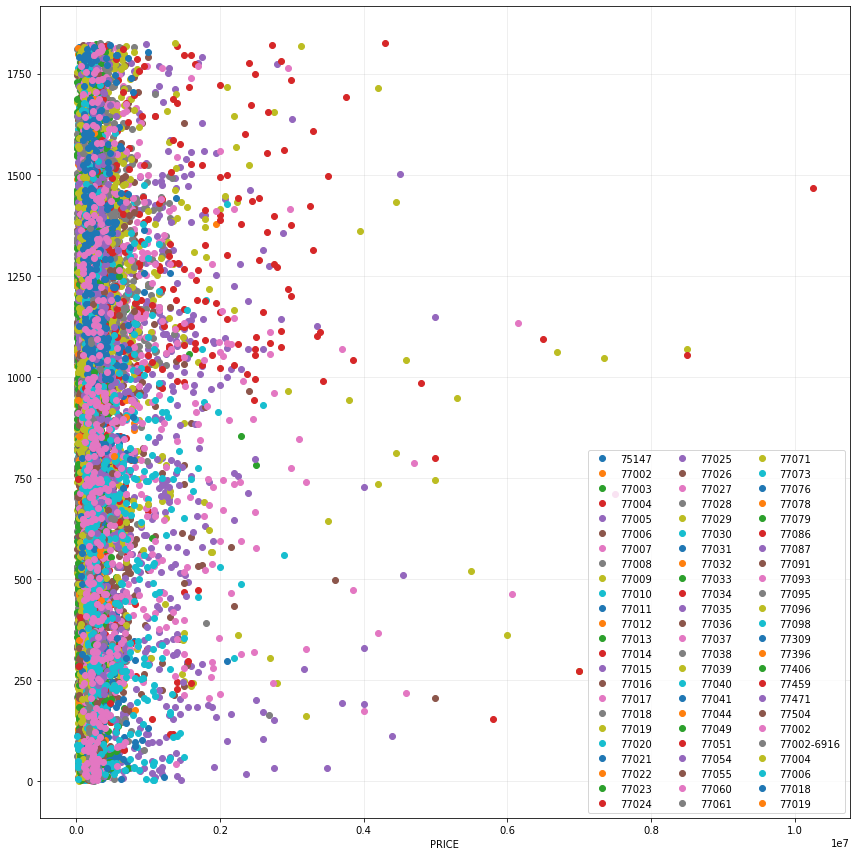

In [279]:
# redfin_data_all.groupby('SOLD YEAR').plot('PRICE', 'DAYS ON MARKET', kind='scatter',c='SOLD YEAR', cmap='jet')


fig, ax = plt.subplots(figsize=(12, 12))
for label, grp in redfin_data_all.groupby(['ZIP OR POSTAL CODE']):
    grp.plot(x = 'PRICE', y = 'DAYS ON MARKET',ax = ax, label = label, linewidth=0, marker='o')
    plt.grid(alpha=0.25)
    plt.legend(ncol=3)
plt.tight_layout()

In [278]:
redfin_data_all.plot(x = 'LATITUDE', 
                                              y = 'LONGITUDE',
                                              linewidth=0, 
                                              marker='o',
                                             color='PRICE',
                                             cmap='jet')

C:\Users\troub\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\troub\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


<AxesSubplot:xlabel='LATITUDE'>

ValueError: Invalid RGBA argument: 'PRICE'

<Figure size 432x288 with 1 Axes>

In [230]:




url_fortbend="https://txcip.org/tac/census/profile.php?FIPS=48157"
url_montgomery="https://txcip.org/tac/census/profile.php?FIPS=48339"
url_trinity="https://txcip.org/tac/census/profile.php?FIPS=48455"
url_galveston="https://txcip.org/tac/census/profile.php?FIPS=48167"
url_harris="https://txcip.org/tac/census/profile.php?FIPS=48201"

url=[url_harris, url_fortbend, url_montgomery, url_trinity, url_galveston]
print(url)

df_income_smry=pd.DataFrame([])

for url_i in url:
    print(url_i)
    demog=pd.read_html(url_i)
    
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_income=df_demog[df_demog[0].str.contains('Income - 2019')]
    df_income_smry_temp=pd.DataFrame(df_income.pivot(index='County', columns=[0], values=[1]))
    df_income_smry=pd.concat([df_income_smry,df_income_smry_temp[1]])
    
    
df_income_smry


['https://txcip.org/tac/census/profile.php?FIPS=48201', 'https://txcip.org/tac/census/profile.php?FIPS=48157', 'https://txcip.org/tac/census/profile.php?FIPS=48339', 'https://txcip.org/tac/census/profile.php?FIPS=48455', 'https://txcip.org/tac/census/profile.php?FIPS=48167']
https://txcip.org/tac/census/profile.php?FIPS=48201
https://txcip.org/tac/census/profile.php?FIPS=48157
https://txcip.org/tac/census/profile.php?FIPS=48339
https://txcip.org/tac/census/profile.php?FIPS=48455
https://txcip.org/tac/census/profile.php?FIPS=48167


,1,1,1
County,,,
GALVESTON COUNTY,"$61,638","$60,002","$282,809,166,000"
HARRIS COUNTY,"$101,361","$59,653","$48,419,712,000"
FORT BEND COUNTY,"$88,833","$63,424","$38,523,113,000"
MONTGOMERY COUNTY,"$43,788","$36,062","$528,344,000"
TRINITY COUNTY,"$73,214","$54,250","$18,561,154,000"


In [218]:
# url="https://txcip.org/tac/census/profile.php?FIPS=48201"
url="https://txcip.org/tac/census/profile.php?FIPS=48455"
demog=pd.read_html(url)
# demog

In [207]:
len(demog)

1

In [208]:
df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
df_county_name[0]

17    POPULATION OF PLACES IN TRINITY COUNTY - 2020 ...
Name: 0, dtype: object

In [209]:
str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
str1

'TRINITY COUNTY - 2020 ...\nName: 0, dtype: object'

In [210]:
str2=str(str1).split(" - ")
str2[0]

'TRINITY COUNTY'

In [211]:
df_demog=demog[0]
df_demog['County']=str2[0]

In [212]:
df_income=df_demog[df_demog[0].str.contains('Income - 2019')]
df_income

,0,1,2,County
50,Per Capita Income - 2019 (BEA):,"$36,062",More data,TRINITY COUNTY
51,Total Personal Income - 2019 (BEA):,"$528,344,000",More data,TRINITY COUNTY
52,Median Household Income - 2019 (Census Bureau):,"$43,788",More data,TRINITY COUNTY


In [213]:
df_income.pivot(index='County', columns=[0], values=[1])

1  \
0              Median Household Income - 2019 (Census Bureau):   
County                                                           
TRINITY COUNTY                                         $43,788   

                                                \
0              Per Capita Income - 2019 (BEA):   
County                                           
TRINITY COUNTY                         $36,062   

                                                    
0              Total Personal Income - 2019 (BEA):  
County                                              
TRINITY COUNTY                        $528,344,000

In [248]:
pop=pd.read_html("https://www.texas-demographics.com/counties_by_population")
pop=pd.DataFrame(pop[0]).drop('Rank', axis=1)
pop['County']=pop['County'].str.upper()
pop

,County,Population
0,HARRIS COUNTY,4646630
1,DALLAS COUNTY,2606868
2,TARRANT COUNTY,2049770
3,BEXAR COUNTY,1952843
4,TRAVIS COUNTY,1226805
...,...,...
248,BORDEN COUNTY,613
249,KENEDY COUNTY,568
250,KING COUNTY,237
251,LOVING COUNTY,98


In [276]:
# The population as of July 1, 2019 as estimated by the United States Census Bureau
state_county_data=pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents#cite_note-14")
state_county_data_clean=state_county_data[0]
state_county_data_clean=state_county_data_clean.rename(columns={'County or equivalent':'County',
                                                                'State or equivalent':'State',
                                                               'Population (2019 estimate)':'Pop2019'})
state_county_data_clean=state_county_data_clean[['County','State','Pop2019']]
state_county_data_clean['County']=state_county_data_clean['County'].str.upper() + " COUNTY"
state_county_data_clean['State']=state_county_data_clean['State'].str.upper()
state_county_data_clean
# state_county_data_clean[(state_county_data_clean['County'].str.contains('HARRIS ')) & (state_county_data_clean['State'].str.contains('TEXAS'))]

,County,State,Pop2019
0,AUTAUGA COUNTY,ALABAMA,55869
1,BALDWIN COUNTY,ALABAMA,223234
2,BARBOUR COUNTY,ALABAMA,24686
3,BIBB COUNTY,ALABAMA,22394
4,BLOUNT COUNTY,ALABAMA,57826
...,...,...,...
3240,SWEETWATER COUNTY,WYOMING,42343
3241,TETON COUNTY,WYOMING,23464
3242,UINTA COUNTY,WYOMING,20226
3243,WASHAKIE COUNTY,WYOMING,7805
